<a href="https://colab.research.google.com/github/rehman2222/AI/blob/main/Final_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME:   ABDUR REHMAN

REG_NO:SP23-BSE-123


ML Model Results (Diabetes):
      Metric     Score
0   Accuracy  0.719101
1  Precision  0.718750
2     Recall  0.589744
3   F1-Score  0.647887


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8979 - loss: 0.3429 - val_accuracy: 0.9784 - val_loss: 0.0743
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9824 - loss: 0.0592 - val_accuracy: 0.9815 - val_loss: 0.0621
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9898 - loss: 0.0327 - val_accuracy: 0.9824 - val_loss: 0.0589
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9925 - loss: 0.0244 - val_accuracy: 0.9853 - val_loss: 0.0573
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9955 - loss: 0.0149 - val_accuracy: 0.9833 - val_loss: 0.0660


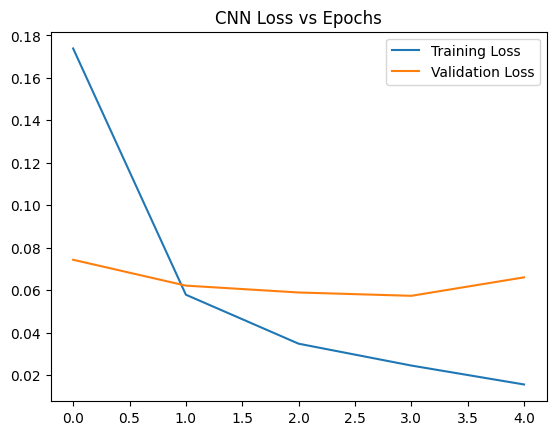

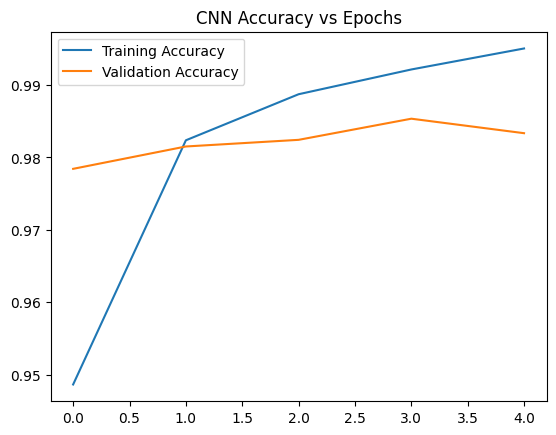

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7364 - loss: 0.7562 - val_accuracy: 0.9643 - val_loss: 0.1185
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9702 - loss: 0.0979 - val_accuracy: 0.9825 - val_loss: 0.0615
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9805 - loss: 0.0659 - val_accuracy: 0.9851 - val_loss: 0.0509
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9858 - loss: 0.0463 - val_accuracy: 0.9835 - val_loss: 0.0554
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9885 - loss: 0.0375 - val_accuracy: 0.9864 - val_loss: 0.0477
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9854 - loss: 0.0452

Modified Hybrid Model Accuracy: 0.9869999885559082
Modified Hybrid Model Loss: 0.039405982941389084
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


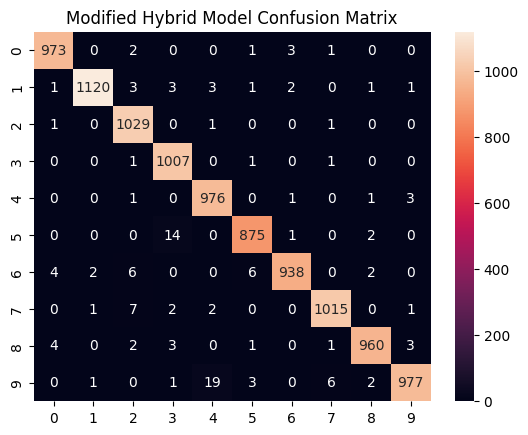

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9805 - loss: 0.0692

Model Comparison:
                        Model  Accuracy
0                         CNN    0.9846
1  Modified CNN + LSTM Hybrid    0.9870


In [2]:
# =========================================
# AI TERMINAL EXAM – ALL IN ONE FILE
# Q1 + Q2 + Modified Q3
# =========================================

# -------- IMPORT LIBRARIES --------
import numpy as np  # Numerical operations
import pandas as pd  # Data tables
import matplotlib.pyplot as plt  # Plotting graphs
import seaborn as sns  # Confusion matrix visualization

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, LSTM, Reshape

# =========================================
# QUESTION 1: MACHINE LEARNING (DIABETES)
# =========================================

# Load diabetes dataset
diabetes = load_diabetes()
X = diabetes.data  # features
y = diabetes.target  # target

# Preprocessing
X = np.nan_to_num(X)  # handle missing values
y = np.where(y > y.mean(), 1, 0)  # binary classification

scaler = StandardScaler()  # standardize features
X = scaler.fit_transform(X)

# Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Logistic Regression
ml_model = LogisticRegression()
ml_model.fit(X_train, y_train)

# Predict & evaluate
y_pred = ml_model.predict(X_test)
ml_results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Score": [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ]
})
print("\nML Model Results (Diabetes):")
print(ml_results)

# =========================================
# QUESTION 2: DEEP LEARNING (MNIST - CNN)
# =========================================

# Load MNIST dataset
(X_train_dl, y_train_dl), (X_test_dl, y_test_dl) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape
X_train_dl = X_train_dl / 255.0
X_test_dl = X_test_dl / 255.0
X_train_dl = X_train_dl.reshape(-1,28,28,1)
X_test_dl = X_test_dl.reshape(-1,28,28,1)

# CNN model
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train CNN
cnn_history = cnn_model.fit(
    X_train_dl, y_train_dl,
    epochs=5,
    validation_split=0.2
)

# Plot CNN Loss
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("CNN Loss vs Epochs")
plt.show()

# Plot CNN Accuracy
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("CNN Accuracy vs Epochs")
plt.show()

# Save CNN model
cnn_model.save("mnist_cnn_model.h5")

# =========================================
# QUESTION 3: MODIFIED HYBRID MODEL (CNN + LSTM)
# =========================================

# Build modified hybrid model
hybrid_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),  # CNN layer
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),  # additional CNN
    MaxPooling2D(2,2),
    Flatten(),                              # flatten for LSTM
    Reshape((25,64)),                       # reshape to (timesteps, features)
    LSTM(64),                               # LSTM reads CNN features
    Dense(128, activation='relu'),          # dense layer
    Dense(10, activation='softmax')         # output layer
])

# Compile hybrid model
hybrid_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train hybrid model
hybrid_history = hybrid_model.fit(
    X_train_dl, y_train_dl,
    epochs=5,
    validation_split=0.2
)

# Evaluate hybrid model
hybrid_loss, hybrid_accuracy = hybrid_model.evaluate(X_test_dl, y_test_dl)
print("\nModified Hybrid Model Accuracy:", hybrid_accuracy)
print("Modified Hybrid Model Loss:", hybrid_loss)

# Confusion Matrix
y_pred_h = np.argmax(hybrid_model.predict(X_test_dl), axis=1)
cm = confusion_matrix(y_test_dl, y_pred_h)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Modified Hybrid Model Confusion Matrix")
plt.show()

# =========================================
# FINAL COMPARISON
# =========================================

# Evaluate CNN on test data
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_dl, y_test_dl)

# Compare CNN and Modified Hybrid
comparison = pd.DataFrame({
    "Model": ["CNN", "Modified CNN + LSTM Hybrid"],
    "Accuracy": [cnn_accuracy, hybrid_accuracy]
})
print("\nModel Comparison:")
print(comparison)
